In [54]:
# Ref: https://www.kaggle.com/code/abhishekyadav475/stock-price-prediction-model/notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv("prices-split-adjusted.csv")
df = pd.DataFrame(data)

# EDA 

In [28]:
df.tail(5)

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [29]:
df. isna().any()

date      False
symbol    False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

In [30]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


<AxesSubplot:>

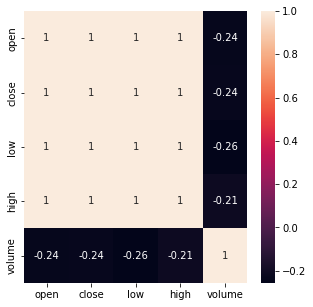

In [31]:
df = df[df['symbol']=='ZION']   # Choosin stock values for some company 
cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [32]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [33]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.996595
close,1.000000
low,0.998434
high,0.998435


In [34]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
716,12.940000,13.33,12.88,13.37
1184,13.280000,13.80,13.23,13.83
1652,13.670000,15.00,13.66,15.01
2120,14.970000,16.68,14.95,17.00
2588,16.190001,16.41,15.52,16.66


In [35]:
df.shape

(1762, 4)

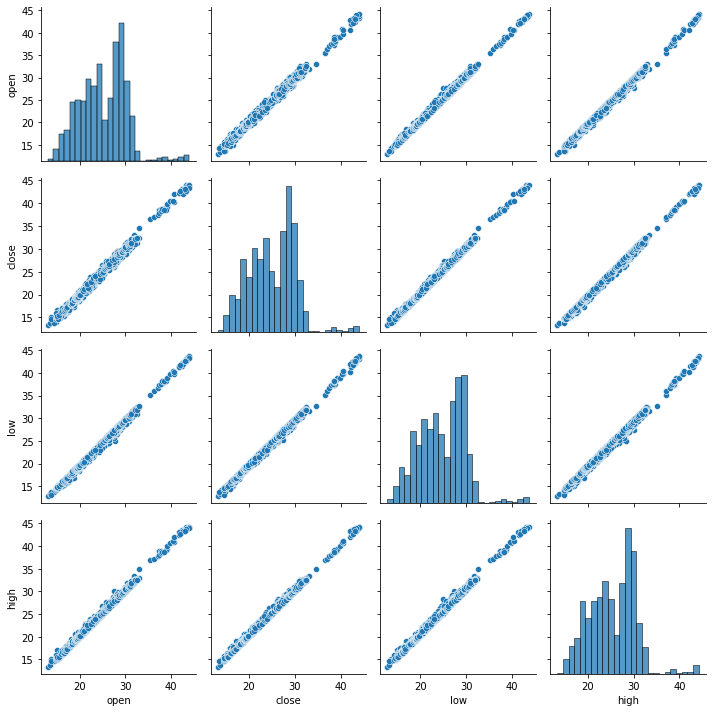

In [36]:
sns.pairplot(df)
plt.tight_layout()

In [37]:
X = df.drop(['close'], axis=1)
y = df['close']

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.000000,0.000000,0.000000
1,0.010911,0.011367,0.014945
2,0.023427,0.025333,0.053281
3,0.065148,0.067230,0.117934
4,0.104300,0.085742,0.106888


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [43]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675603,31.520000,31.377626
676100,30.639999,30.791728
676597,29.980000,29.744015
677094,30.120001,30.074008
677591,30.500000,30.411356


In [45]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9981798573694914


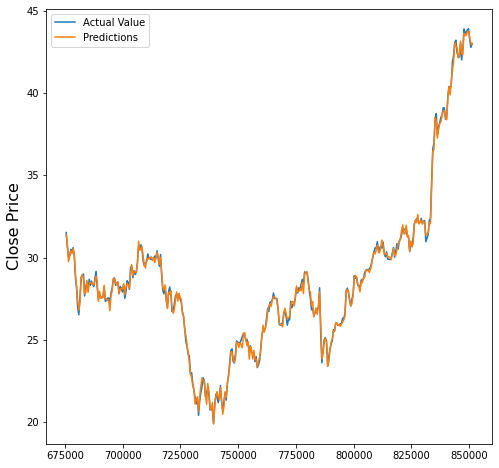

In [46]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

Now let's try ANN

In [47]:
from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [48]:
model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, verbose=0, validation_split=0.25)

In [51]:
y_pred_2 = model_2.predict(X_test)
y_pred_2.shape

12/12 [==============================] - 0s 2ms/step


(353, 1)

In [52]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675603,31.520000,31.010481
676100,30.639999,30.959820
676597,29.980000,29.996340
677094,30.120001,30.000002
677591,30.500000,30.270882


In [53]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9960899275392249


CNN